<a href="https://colab.research.google.com/github/YakovM93/Short-Range-Oversquashing/blob/main/Short_Range_Oversqaushing_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Saved: model_accuracy_vs_dimension.pdf


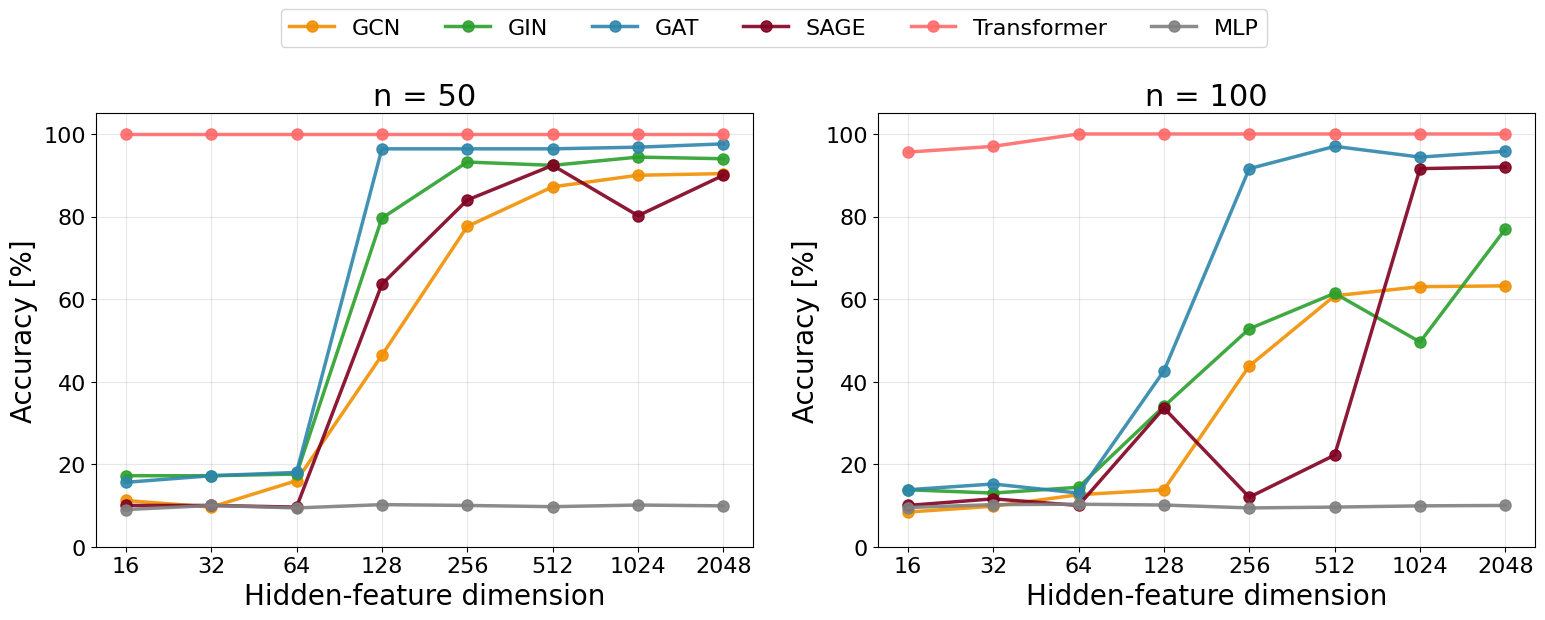

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model colors
model_colors = {
    'GCN': '#F18F01',
    'GIN': '#2ca02c',
    'GAT': '#2E86AB',
    'SAGE': '#800020',
    'Transformer': '#FF6B6B',
    'MLP': '#808080'
}

# Complete data from images
data = {
    'GCN': {
        50: [11.2, 9.6, 16, 46.4, 77.6, 87.2, 90, 90.4],
        100: [8.4, 9.8, 12.6, 13.8, 43.8, 60.8, 63, 63.2]
    },
    'SAGE': {
        50: [10, 10, 9.6, 63.6, 84, 92.4, 80.2, 90],
        100: [10, 11.6, 10, 33.6, 12, 22.2, 91.6, 92]
    },
    'GIN': {
        50: [17.2, 17.2, 17.6, 79.6, 93.2, 92.4, 94.4, 94],
        100: [13.8, 13, 14.4, 34, 52.8, 61.4, 49.6, 77]
    },
    'GAT': {
        50: [15.6, 17.2, 18, 96.4, 96.4, 96.4, 96.8, 97.6],
        100: [13.8, 15.2, 13, 42.6, 91.6, 97, 94.4, 95.8]
    },
    'MLP': {
        50: [9, 10, 9.4, 10.2, 10, 9.7, 10.1, 9.9],
        100: [9.5, 10.2, 10.3, 10.1, 9.4, 9.6, 9.9, 10]
    },
    'Transformer': {
        50: [100, 100, 100, 100, 100, 100, 100, 100],
        100: [95.6, 97, 100, 100, 100, 100, 100, 100]
    }
}

dimensions = [16, 32, 64, 128, 256, 512, 1024, 2048]
models = list(model_colors.keys())

# Create figure with 2 subplots (one for n=50, one for n=100)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Use evenly spaced x positions
x_pos = np.arange(len(dimensions))

# Plot for n=50
ax1 = axes[0]
for model in models:
    ax1.plot(x_pos, data[model][50], marker='o', linewidth=2.5,
             markersize=8, label=model, color=model_colors[model], alpha=0.9)

ax1.set_xlabel('Hidden-feature dimension', fontsize=20)
ax1.set_ylabel('Accuracy [%]', fontsize=20)
ax1.set_title('n = 50', fontsize=22)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_ylim(0, 105)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(dimensions)

# Plot for n=100
ax2 = axes[1]
for model in models:
    ax2.plot(x_pos, data[model][100], marker='o', linewidth=2.5,
             markersize=8, label=model, color=model_colors[model], alpha=0.9)

ax2.set_xlabel('Hidden-feature dimension', fontsize=20)
ax2.set_ylabel('Accuracy [%]', fontsize=20)
ax2.set_title('n = 100', fontsize=22)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_ylim(0, 105)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(dimensions)

# Create legend handles and labels
handles, labels = ax1.get_legend_handles_labels()

# Add single legend at top center
fig.legend(handles, labels, fontsize=16, loc='upper center',
           bbox_to_anchor=(0.5, 1.08), ncol=len(models))

plt.tight_layout()
plt.savefig('model_accuracy_vs_dimension.pdf', format='pdf', dpi=300, bbox_inches='tight')
print("✅ Saved: model_accuracy_vs_dimension.pdf")
plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Output dir
output_dir = 'gnn_plots'
os.makedirs(output_dir, exist_ok=True)

# Data
k_values = [1, 5, 10, 20]
acc_values = [44.8, 11.6, 13.2, 12.6]

# Standard errors from your image
stderr_values = [0.1166190379, 0.2925747768, 0.3286335345, 0.2154065923]

# Color – GCN color
gcn_color = '#A23B72'

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(k_values))

# Bar plot with error bars
bars = ax.bar(x, acc_values, color=gcn_color, width=0.6, label='GCN',
              yerr=stderr_values, ecolor='black', capsize=5,
              error_kw={'linewidth': 1.5})

ax.set_xlabel('Number of central nodes $k$', fontsize=20)
ax.set_ylabel('Accuracy [%]', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(k_values)
ax.tick_params(labelsize=17)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)
ax.legend(fontsize=17)

plt.tight_layout()
pdf_path = os.path.join(output_dir, 'gcn_k_central_nodes_accuracy_bar_with_stderr.pdf')
plt.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
print(f"Saved: {pdf_path}")
plt.close()

Saved: gnn_plots/gcn_k_central_nodes_accuracy_bar_with_stderr.pdf


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

# Create output directory for PDFs
output_dir = 'gnn_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# MODELS (Transformer + MLP added at the end for legend order)
models = ['GCN', 'GIN', 'GAT', 'SAGE', 'Transformer', 'MLP']
learning_rates = [0.0001, 0.0005, 0.00005]
dimensions = [256, 1024]
n_values = [10, 50, 100, 150, 200]

# ===== MLP accuracies (broadcast across LRs) =====
mlp_acc_256  = [27.37, 11.1, 10.3,  9.5,  9.2]
mlp_acc_1024 = [26.00, 18.0,  9.0,  9.33, 10.8]

# Standard Error (stdeva/sqrt(n)) - order as given: [200, 150, 100, 50, 10]
error_bars_stderr = {
    'SAGE': {
        256: [0.196977156, 0.1141115378, 0.2720294102, 0.1058300524, 0.4472135955],
        1024: [0.1319090596, 0.1618023486, 0.3370459909, 18.03179414, 0.632455532]
    },
    'GAT': {
        256: [4.719788131, 8.88742612, 9.017405392, 0.5741080038, 0.4898979486],
        1024: [14.91145197, 3.784890487, 1.155896189, 0.2332380758, 0.7483314774]
    },
    'GIN': {
        256: [0.2477902339, 0.213316666, 6.090451545, 2.151836425, 1.469693846],
        1024: [0.2236067977, 0.2777876887, 3.224530974, 0.6066300355, 0.632455532]
    },
    'GCN': {
        256: [0.2049390153, 0.2670692794, 0.1166190379, 10.89961467, 0.4],
        1024: [0.1183215957, 0.1319090596, 0.1624807681, 12.65732989, 0]
    },
    'Transformer': {  # Using Set Transformer values
        256: [0, 1.339870889, 0, 0, 0],
        1024: [0.02, 0, 0, 0, 0]
    },
    'MLP': {
        256: [0, 0, 0.08, 0, 0],
        1024: [0, 0.002, 0.1959591794, 0.09797958971, 0]
    }
}

# DATA (your original + Transformer + MLP)
data = {
    'GAT': {
        256: {
            0.00005: {'acc': [94, 91.6, 79.2, 69.6, 29.7], 'energy': [0.865335, 6.281863, 5.125725, 3.762151, 0.333481]},
            0.0001: {'acc': [98, 96.4, 91.6, 80.4, 60.9], 'energy': [1.304672, 3.848747, 7.739397, 4.509048, 1.93627]},
            0.0005: {'acc': [98, 91.6, 91.3, 86.4, 68.24], 'energy': [2.592046, 2.819522, 9.889914, 4.265632, 3.250363]}
        },
        1024: {
            0.00005: {'acc': [98, 96, 95.47, 94.4, 93.3], 'energy': [1.318873, 1.592153, 2.179103, 3.166447, 3.148321]},
            0.0001: {'acc': [100, 96.8, 94.4, 94.13, 92.4], 'energy': [1.619392, 1.891646, 1.124364, 2.631021, 2.475411]},
            0.0005: {'acc': [100, 96, 39, 45.33, 47], 'energy': [2.704948, 7.7138, 4.573795, 2.722367, 3.612394]}
        }
    },
    'GIN': {
        256: {
            0.0001: {'acc': [100, 93.2, 52.8, 23.47, 20.8], 'energy': [1.061176, 2.41656, 0.566139, 0.221532, 0.126969]},
            0.0005: {'acc': [98, 70.4, 14.4, 22, 11.8], 'energy': [0.873219, 1.078508, 0.037608, 0.135684, 0.006105]},
            0.00005: {'acc': [92, 89.6, 45, 31.33, 24.4], 'energy': [0.797563, 2.633644, 0.201817, 0.393168, 0.125622]}
        },
        1024: {
            0.0001: {'acc': [100, 92.4, 14.4, 11.6, 13.4], 'energy': [0.689293, 0.597672, 0.012415, 0.007473, 0.004872]},
            0.0005: {'acc': [94, 17.6, 12.8, 12.13, 12.4], 'energy': [1.402367, 0.142496, 0.012565, 0.000771, 0.004789]},
            0.00005: {'acc': [92, 94.4, 49.6, 11.47, 12.7], 'energy': [0.422411, 0.685334, 0.012565, 0.007442, 0.004582]}
        }
    },
    'SAGE': {
        256: {
            0.0001: {'acc': [98, 91.6, 13, 26.67, 15.2], 'energy': [0.624745, 1.22618, 0.01756, 0.192943, 0.105949]},
            0.0005: {'acc': [100, 83.6, 13.4, 11.6, 12.1], 'energy': [0.790919, 2.525383, 0.015756, 0.010184, 0.006473]},
            0.00005: {'acc': [98, 84, 12, 36.13, 25.9], 'energy': [0.647555, 1.199696, 0.01721, 0.221702, 0.1398]}
        },
        1024: {
            0.00005: {'acc': [100, 94.8, 13.4, 12, 18.1], 'energy': [0.544982, 0.361035, 0.012539, 0.007279, 0.129943]},
            0.0005: {'acc': [98, 18, 13.4, 12.53, 12.9], 'energy': [1.709758, 0.063191, 0.013705, 0.008601, 0.004703]},
            0.0001: {'acc': [98, 91.6, 80.2, 12, 18.1], 'energy': [1.709758, 0.45602, 0.467653, 0.007279, 0.129943]}
        }
    },
    'GCN': {
        256: {
            0.0001: {'acc': [92, 70, 36.8, 11.73, 24], 'energy': [0.863305, 0.819347, 0.307363, 0.005582, 0.112685]},
            0.0005: {'acc': [94, 77.6, 43.8, 32.4, 24], 'energy': [0.895399, 1.028763, 0.270177, 0.164519, 0.1]},
            0.00005: {'acc': [92, 63.6, 32.2, 32.4, 12.7], 'energy': [0.826403, 0.740781, 0.249936, 0.164519, 0.003761]}
        },
        1024: {
            0.0001: {'acc': [100, 90, 63, 44.67, 35.5], 'energy': [0.875041, 0.407258, 0.35123, 0.191325, 0.144264]},
            0.0005: {'acc': [100, 18, 14.4, 46, 12.6], 'energy': [0.694481, 0.01593, 0.00388, 0.215995, 0.0014]},
            0.00005: {'acc': [98, 61.2, 61.8, 13.33, 35.8], 'energy': [0.885677, 0.461479, 0.323226, 0.005917, 0.157505]}
        }
    },
    'Transformer': {
        256: {
            0.001: {'acc': [100, 100, 100, 100, 100], 'energy': [2.791419, 1.547997, 1.282283, 1.567053, 2.479244]}
        },
        1024: {
            0.001: {'acc': [100, 100, 100, 100, 100], 'energy': [2.791419, 1.547997, 1.282283, 1.567053, 2.479244]}
        }
    },
    'MLP': {
        256: {
            0.0001: {'acc': mlp_acc_256,  'energy': [0, 0, 0, 0, 0]},
            0.0005: {'acc': mlp_acc_256,  'energy': [0, 0, 0, 0, 0]},
            0.00005:{'acc': mlp_acc_256,  'energy': [0, 0, 0, 0, 0]},
        },
        1024: {
            0.0001: {'acc': mlp_acc_1024, 'energy': [0, 0, 0, 0, 0]},
            0.0005: {'acc': mlp_acc_1024, 'energy': [0, 0, 0, 0, 0]},
            0.00005:{'acc': mlp_acc_1024, 'energy': [0, 0, 0, 0, 0]},
        }
    }
}

# Colors
model_colors = {
    'GCN': '#2E86AB',
    'GIN': '#2ca02c',
    'GAT': '#F18F01',
    'SAGE': '#800020',
    'Transformer': '#FF6B6B',
    'MLP': '#808080'
}

def find_best_lr(model, dim, metric='acc'):
    """Find best learning rate for a model and dimension"""
    if model == 'Transformer':
        return (0.001, data[model][dim][0.001][metric]) if 0.001 in data[model][dim] else (None, [])
    best_lr = None
    best_avg = -1 if metric == 'acc' else float('inf')
    for lr in learning_rates:
        if lr in data[model][dim]:
            vals = data[model][dim][lr][metric]
            avg = np.mean(vals)
            if (metric == 'acc' and avg > best_avg) or (metric == 'energy' and avg < best_avg):
                best_avg, best_lr = avg, lr
    return best_lr, (data[model][dim][best_lr][metric] if best_lr else [])

def plot_best_model_accuracy_with_stderr():
    """Bar plots with stderr (red) error bars only."""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Map indices: error data is in order [200, 150, 100, 50, 10]
    # but plot needs [10, 50, 100, 150, 200]
    error_indices = [4, 3, 2, 1, 0]  # Maps plot order to error data order

    for j, dim in enumerate(dimensions):
        ax = axes[j]
        x = np.arange(len(n_values))
        width = 0.13

        for k, model in enumerate(models):
            best_lr, best_acc = find_best_lr(model, dim, 'acc')
            if best_acc:
                # Get error values in correct order for plotting
                all_errors = error_bars_stderr[model][dim] if model in error_bars_stderr else [0]*len(n_values)
                errors = [all_errors[i] for i in error_indices]  # Reorder to match plot

                # Calculate position for this model's bars
                bar_positions = x + k*width

                # Plot bar with stderr error bars (red)
                bars = ax.bar(bar_positions, best_acc, width, label=model,
                              color=model_colors[model], alpha=0.8,
                              yerr=errors, ecolor='black', capsize=3,
                              error_kw={'linewidth': 1.5})

        ax.set_xlabel('Number of nodes $n$', fontsize=20)
        ax.set_ylabel('Accuracy [%]', fontsize=18)
        ax.set_title(f'Dim {dim}', fontsize=20)
        ax.set_xticks(x + width*2.5)
        ax.set_xticklabels(n_values)
        ax.tick_params(labelsize=17)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 116)  # Accommodate error bars

    # Main model legend at the top
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=16.5, loc='upper center',
              bbox_to_anchor=(0.5, 1.05), ncol=len(models))

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    pdf_path = os.path.join(output_dir, 'best_model_accuracy_stderr.pdf')
    plt.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
    print(f"Saved: {pdf_path}")
    plt.close()

# Main execution
if __name__ == "__main__":
    print(f"Creating plots with stderr (red) error bars and saving to '{output_dir}' ...")
    plot_best_model_accuracy_with_stderr()

Creating plots with stderr (red) error bars and saving to 'gnn_plots' ...
Saved: gnn_plots/best_model_accuracy_stderr.pdf


Saved: plots/combined_plots_single_row.pdf


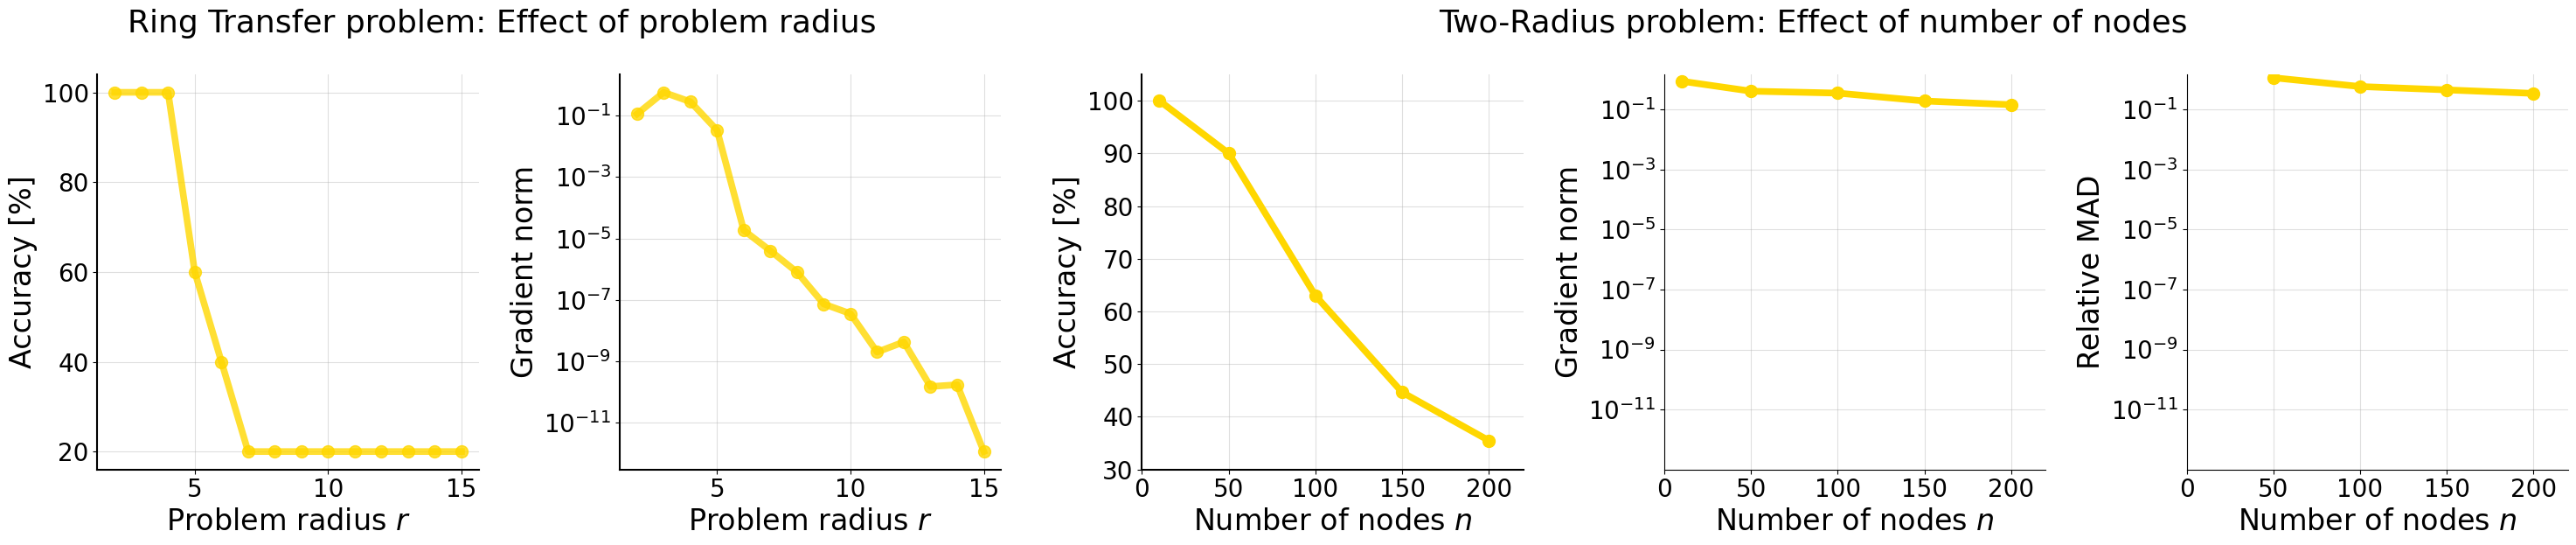

Combined plot saved successfully!

Specifications applied:
- All 5 plots in a single row
- First 2 plots: Ring Transfer problem
- Last 3 plots: Two-Radius problem
- Added Dirichlet energy vs number of nodes
- Plots 4 and 5 have identical log scale y-axis
- Gold colored lines
- Grid alpha = 0.4
- Line thickness = 5.5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.ticker import LogLocator, NullFormatter

# Create output directory
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)

# Data from first code
radius_problem = list(range(2, 16))
accuracies = [
    100.0, 100.0, 100.0, 60.0, 40.0, 20.0, 20.0,
    20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0
]
norm_grad = [
    0.11247611790895462, 0.5691476464271545, 0.28081387281417847,
    0.033362533897161484, 1.8458629710949026e-05, 3.971082605858101e-06,
    7.950091003294801e-07, 7.360683440538196e-08, 3.573425999547908e-08,
    2.007387367441993e-09, 4.2786618692503e-09, 1.5190021462885284e-10,
    1.7369901350594574e-10, 1.1610487961680183e-12
]

# Data from second code
data = {
    'n': [10, 50, 100, 150, 200],
    'acc': [100, 90, 63, 44.67, 35.5],
    'energy': [0.875041, 0.407258, 0.35123, 0.191325, 0.144264]
}
df = pd.DataFrame(data)

# New Dirichlet energy data
dirichlet_data = {
    'n': [50, 100, 150, 200],
    'dirichlet_energy': [1.141349, 0.581828, 0.449181, 0.343572]
}
df_dirichlet = pd.DataFrame(dirichlet_data)

# Create figure with 5 subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
fig.text(0.2, 1.02, "Ring Transfer problem: Effect of problem radius", fontsize=26, ha='center')

# TITLE FOR PLOTS 3–5: "Two-Radius problem: Effect of number of nodes"
fig.text(0.7, 1.02, "Two-Radius problem: Effect of number of nodes", fontsize=26, ha='center')

# Plot 1: Radius vs Accuracy
ax1 = axes[0]
ax1.plot(radius_problem, accuracies, marker='o', color='gold', alpha=0.8, linewidth=5.5, markersize=10)
ax1.set_xlabel('Problem radius $r$', fontsize=24)
ax1.set_ylabel('Accuracy [%]', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(True, alpha=0.4)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# Plot 2: Radius vs Energy (log scale)
ax2 = axes[1]
ax2.plot(radius_problem, norm_grad, marker='o', color='gold', alpha=0.8, linewidth=5.5, markersize=10)
ax2.set_yscale('log')
ax2.set_xlabel('Problem radius $r$', fontsize=24)
ax2.set_ylabel('Gradient norm', fontsize=24)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.grid(True, which="both", alpha=0.4)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

# Plot 3: Accuracy vs Number of Nodes
ax3 = axes[2]
ax3.plot(df['n'], df['acc'], 'o-', color='gold', linewidth=5.5, markersize=10)
ax3.set_xlabel('Number of nodes $n$', fontsize=24)
ax3.set_ylabel('Accuracy [%]', fontsize=24)
ax3.grid(True, alpha=0.4)
ax3.set_xlim(0, 220)
ax3.set_ylim(30, 105)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_linewidth(1.5)
ax3.spines['bottom'].set_linewidth(1.5)
ax3.tick_params(axis='both', which='major', labelsize=20)

# Plot 4: Energy vs Number of Nodes with LOG SCALE
ax4 = axes[3]
ax4.semilogy(df['n'], df['energy'], 'o-', color='gold', linewidth=5.5, markersize=10)
ax4.set_xlabel('Number of nodes $n$', fontsize=24)
ax4.set_ylabel('Gradient norm', fontsize=24)
ax4.grid(True, alpha=0.4, which='both')
ax4.set_xlim(0, 220)
ax4.set_ylim(10**-13, 10**0.17)

exponents = [-1, -3, -5, -7, -9, -11]
y_ticks = [10**e for e in exponents]
ax4.set_yticks(y_ticks)
ax4.set_yticklabels([fr'$10^{{{e}}}$' for e in exponents])

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(axis='both', which='major', labelsize=20)

# Plot 5: Dirichlet Energy vs Number of Nodes (LOG SCALE - same as plot 4)
ax5 = axes[4]
ax5.semilogy(df_dirichlet['n'], df_dirichlet['dirichlet_energy'], 'o-', color='gold', linewidth=5.5, markersize=10)
ax5.set_xlabel('Number of nodes $n$', fontsize=24)
ax5.set_ylabel('Relative MAD', fontsize=24)
ax5.grid(True, alpha=0.4, which='both')
ax5.set_xlim(0, 220)
ax5.set_ylim(10**-13, 10**0.17)

# Same y-axis ticks as plot 4
y_ticks = [10**e for e in exponents]
ax5.set_yticks(y_ticks)
ax5.set_yticklabels([fr'$10^{{{e}}}$' for e in exponents])

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.tick_params(axis='both', which='major', labelsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save as PDF
pdf_path = os.path.join(output_dir, 'combined_plots_single_row.pdf')
plt.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
print(f"Saved: {pdf_path}")
plt.show()
plt.close()

print("Combined plot saved successfully!")
print("\nSpecifications applied:")
print("- All 5 plots in a single row")
print("- First 2 plots: Ring Transfer problem")
print("- Last 3 plots: Two-Radius problem")
print("- Added Dirichlet energy vs number of nodes")
print("- Plots 4 and 5 have identical log scale y-axis")
print("- Gold colored lines")
print("- Grid alpha = 0.4")
print("- Line thickness = 5.5")

Saved: plots/epochs_trend_plot.pdf


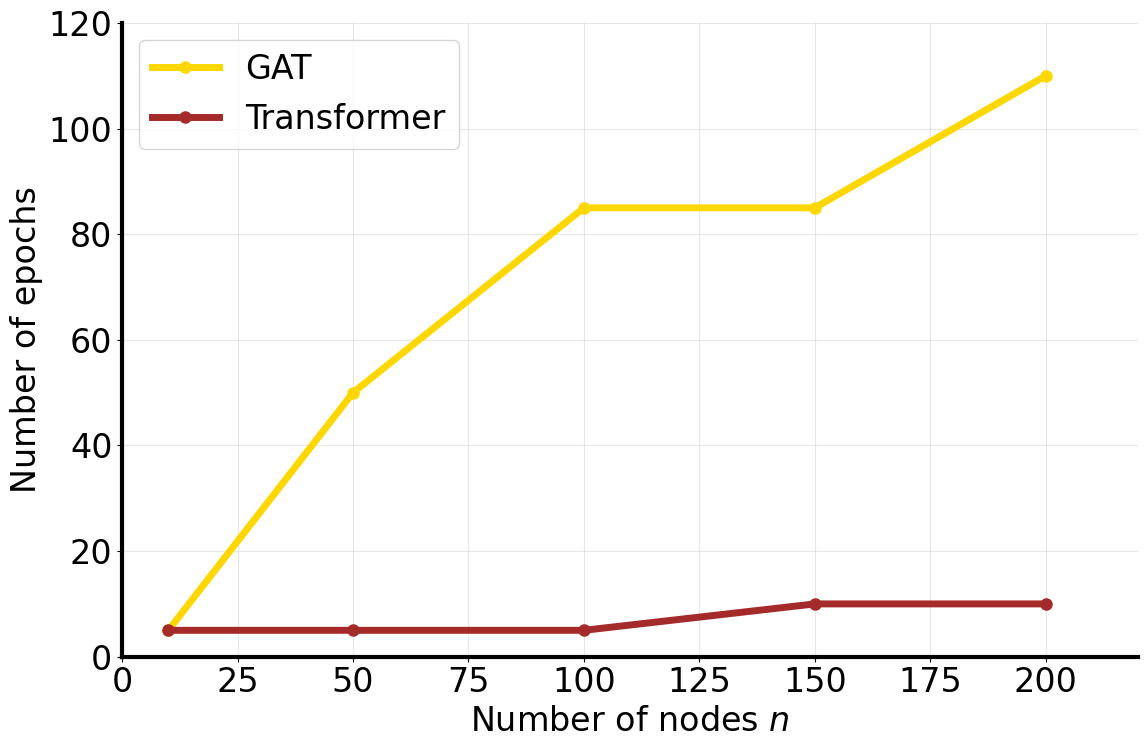

Saved: plots/epochs_bar_plot.pdf


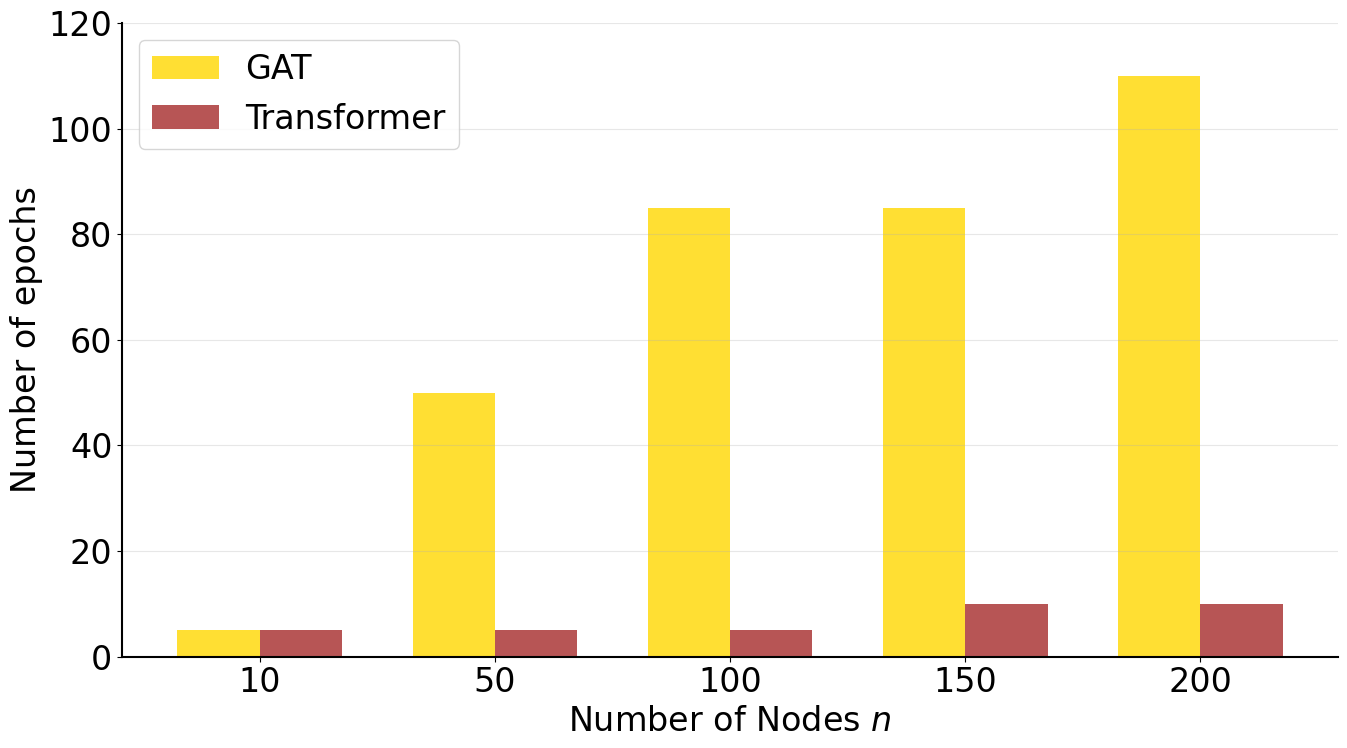

✅ All plots saved successfully!

Data Summary:
  n  GAT_epochs  Transformer_epochs
 10           5                   5
 50          50                   5
100          85                   5
150          85                  10
200         110                  10


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Create output directory
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)

# Data: Epochs to reach ≥92% validation accuracy
data = {
    'n': [10, 50, 100, 150, 200],
    'GAT_epochs': [5, 50, 85, 85, 110],
    'Transformer_epochs': [5, 5, 5, 10, 10]
}

df = pd.DataFrame(data)

# Set up plotting style
plt.rcParams['font.size'] = 24
plt.rcParams['axes.titlesize'] =24
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

# Plot 1: Trend Plot - Epochs vs Number of Nodes
fig1, ax1 = plt.subplots(figsize=(12, 8))

# Plot lines with specified colors and thickness
ax1.plot(df['n'], df['GAT_epochs'], 'o-', color='gold', linewidth=5, markersize=8, label='GAT')
ax1.plot(df['n'], df['Transformer_epochs'], 'o-', color='brown', linewidth=5, markersize=8, label='Transformer')

ax1.set_xlabel('Number of nodes $n$', fontsize=24)
ax1.set_ylabel('Number of epochs', fontsize=24)
#ax1.set_title('Epochs to Reach ≥92% Validation Accuracy vs Number of Nodes', fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=24)
ax1.set_xlim(0, 220)
ax1.set_ylim(0, 120)

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)

plt.tight_layout()
pdf_path = os.path.join(output_dir, 'epochs_trend_plot.pdf')
plt.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
print(f"Saved: {pdf_path}")
plt.show()
plt.close()

# Plot 2: Bar Plot - Epochs for each Number of Nodes
fig2, ax2 = plt.subplots(figsize=(14, 8))

x = np.arange(len(df['n']))
width = 0.35

# Create bars
bars1 = ax2.bar(x - width/2, df['GAT_epochs'], width, label='GAT', color='gold', alpha=0.8)
bars2 = ax2.bar(x + width/2, df['Transformer_epochs'], width, label='Transformer', color='brown', alpha=0.8)

ax2.set_xlabel('Number of Nodes $n$', fontsize=24)
ax2.set_ylabel('Number of epochs', fontsize=24)
#ax2.set_title('Epochs to Reach ≥92% Validation Accuracy by Number of Nodes', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(df['n'])
ax2.legend(fontsize=24)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 120)

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
pdf_path = os.path.join(output_dir, 'epochs_bar_plot.pdf')
plt.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
print(f"Saved: {pdf_path}")
plt.show()
plt.close()

print("✅ All plots saved successfully!")

# Display the data table
print("\nData Summary:")
print(df.to_string(index=False))

✅ Saved: GCN_VN_vs_GCN_accuracy_with_stderr.pdf


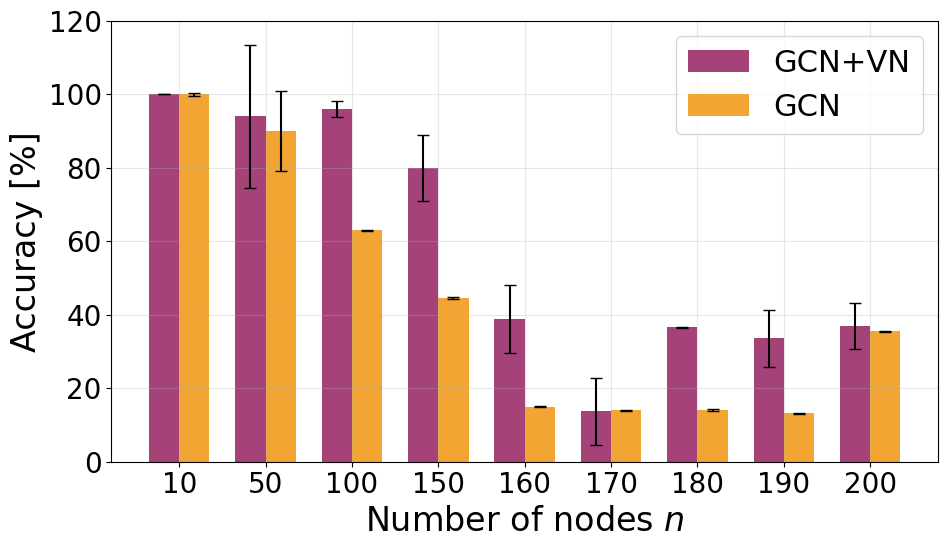

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your images - now including all n values
n_values = [10, 50, 100, 150, 160, 170, 180, 190, 200]

# GCN with Virtual Node data (dim virtual node=1024, dim model=1024, lr=0.0005)
gcn_vn_data = {
    'acc': [100, 94, 96, 79.87, 38.87, 13.76, 36.56, 33.58, 37],
    'energy': [1.44629, 1.67925, 1.07062, 0.77909, 0.5151]
}

# GCN without Virtual Node data (lr=0.0001, dim=1024)
gcn_data = {
    'acc': [100, 90, 63, 44.67, 15, 14, 14, 13.16, 35.5],
    'energy': [0.875041, 0.407258, 0.35123, 0.191325, 0.144264]
}

# Standard errors (stderr) for error bars
gcn_stderr = [0.4, 10.89961467, 0.1166190379, 0.2670692794, 0.2026474772,
              0.1591665794, 0.2247354, 0.2247354, 0.2049390153]

gcn_vn_stderr = [0, 19.48184796, 2.111397641, 9.015988354, 9.355449,
                 9.127181712, 0.2, 7.793426332, 6.338343632]

# Create the accuracy comparison plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(n_values))
width = 0.35
colors = {'gcn_vn': '#A23B72', 'gcn': '#F18F01'}

# Accuracy bars with error bars
bars1 = ax.bar(x - width/2, gcn_vn_data['acc'], width,
               label='GCN+VN', color=colors['gcn_vn'], alpha=0.96,
               yerr=gcn_vn_stderr, ecolor='black', capsize=4,
               error_kw={'linewidth': 1.5})

bars2 = ax.bar(x + width/2, gcn_data['acc'], width,
               label='GCN', color=colors['gcn'], alpha=0.8,
               yerr=gcn_stderr, ecolor='black', capsize=4,
               error_kw={'linewidth': 1.5})

ax.set_xlabel('Number of nodes $n$', fontsize=24)
ax.set_ylabel('Accuracy [%]', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(n_values)
ax.tick_params(labelsize=20)
ax.legend(fontsize=22)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 120)  # Increased to accommodate error bars

plt.tight_layout()

# Save as PDF
plt.savefig('GCN_VN_vs_GCN_accuracy_with_stderr.pdf', format='pdf', bbox_inches='tight', dpi=300)
print("✅ Saved: GCN_VN_vs_GCN_accuracy_with_stderr.pdf")
plt.show()
plt.close()